# ***Machine Learning Project 2 : Customer Churn Prediction***

- ***Overview*** -
Customer churn, or customer attrition, refers to when a customer ceases their relationship
with a company or service provider. In today's highly competitive business environment,
retaining customers is a critical factor for long-term success. Predicting customer churn can
help organizations take proactive steps to retain customers, thus minimizing revenue loss.
This project aims to build a machine learning model that can predict whether a customer will
churn based on their demographic, account, and service-related data.
- ***Problem Statement*** - The goal of this project is to develop a classification model that predicts whether a customer
will churn. Using demographic data (such as gender, senior citizen status, and tenure), along
with information about the services they use (such as internet service, phone service, and
online security), we will attempt to build a model that helps the company identify customers
who are at a high risk of churning.
By predicting customer churn, the company can proactively design retention strategies to
keep these customers, thereby improving customer satisfaction and reducing financial loss.

## Importing Libraries

In [31]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")   
pd.set_option('display.max_columns', None)

## Data Exploration and Cleaning

In [32]:
# Load Dataset
df=pd.read_excel(r"C:\Users\jpran\Downloads\Customer_data.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# Data Understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
# Data Description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
# Data Cleaning
df.dropna(subset=['Churn'],inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Encode binary columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Drop ID
df.drop('customerID', axis=1, inplace=True)

#### Visualization

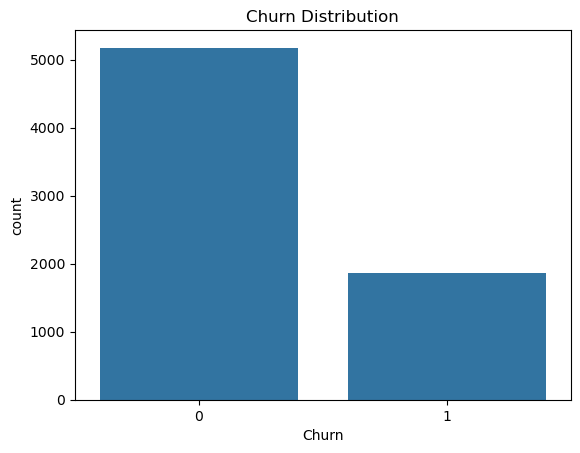

In [36]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

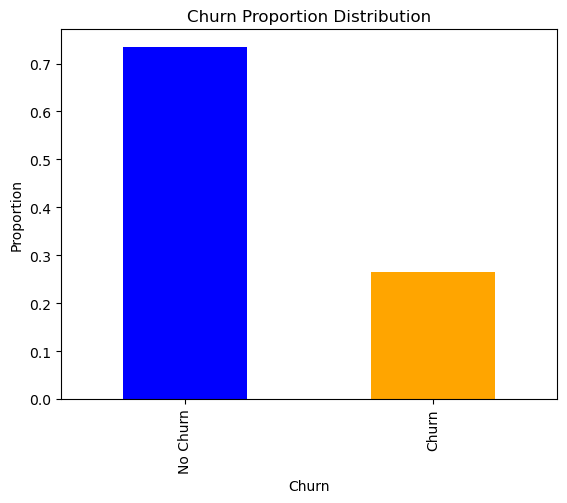

In [ ]:
# Churn proportion
df['Churn'].value_counts(normalize=True).plot(kind='bar')
plt.title("Churn Proportion Distribution")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.ylabel("Proportion")
plt.show()

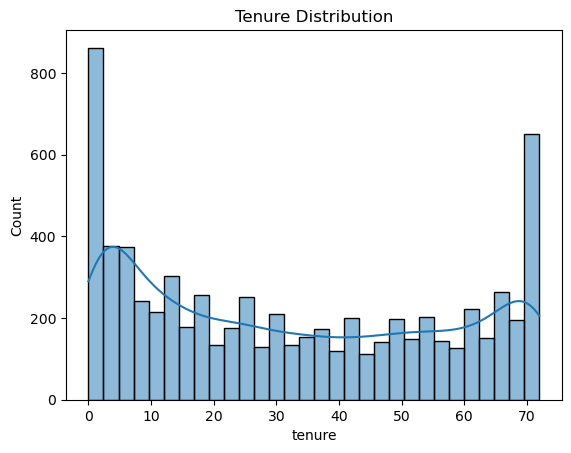

In [38]:
# Tenure histogram
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()

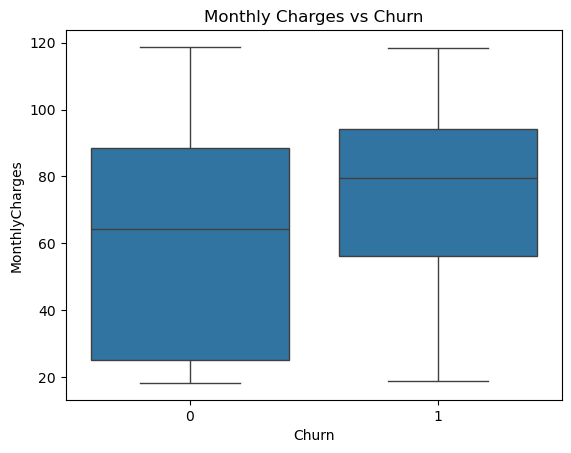

In [39]:
# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

### Summary
- Cleaned missing values and encoded binary columns

- Created visualizations for churn, tenure, and charges

- Identified patterns such as high churn for high-paying short-term customersx

## Preprocessing

In [40]:
# Identify categorical and numerical columns
multi_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'Contract', 'PaymentMethod', 'SeniorCitizen']
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

# One-hot encoding for low cardinality categorical features
X = pd.get_dummies(df.drop('Churn', axis=1), columns=multi_cat, drop_first=True)

X.fillna(X.median(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Modeling and Evaluation

In [41]:
# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000,class_weight='balanced', random_state=42),
    'Decision Tree': GridSearchCV(DecisionTreeClassifier(random_state=42), {'max_depth': [5, 10, 15]}, cv=3),
    'Random Forest': GridSearchCV(RandomForestClassifier(random_state=42),
                                   {'n_estimators': [100, 200], 'max_depth': [10, 20]}, cv=3),
    'Gradient Boosting': GridSearchCV(GradientBoostingClassifier(random_state=42), 
                                      {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}, cv=3),
    'XGBoost': GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}, cv=3),
    'SVM': GridSearchCV(SVC(probability=True), 
                        {'C': [0.5, 1, 2], 'kernel': ['linear', 'rbf']}, cv=3)
}


results = {}
best_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }
    best_models[name] = model

result_df = pd.DataFrame(results).T.sort_values(by='ROC AUC', ascending=False)
print('\nModel Performance Comparison:\n')
print(result_df)



Model Performance Comparison:

                     Accuracy  F1 Score   ROC AUC
Gradient Boosting    0.812633  0.598784  0.865645
Logistic Regression  0.747339  0.632990  0.861911
Random Forest        0.807665  0.588771  0.860000
XGBoost              0.806246  0.596750  0.855400
SVM                  0.819730  0.635057  0.852119
Decision Tree        0.806246  0.557536  0.848196


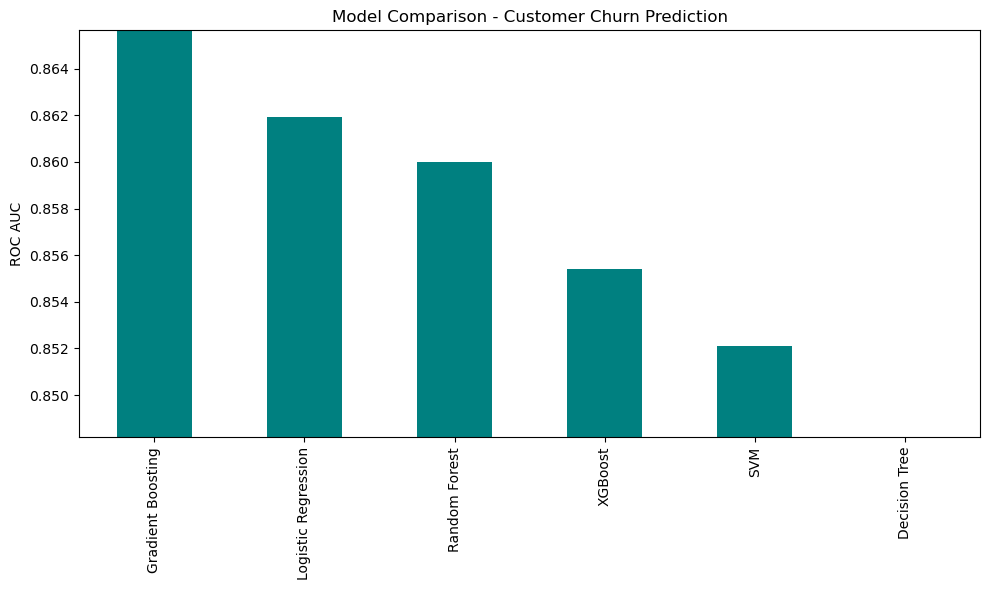

Best model saved as 'final_churn_model.pkl' (Gradient Boosting)


In [ ]:
# Visualize model performance
plt.figure(figsize=(10, 6))
result_df['ROC AUC'].plot(kind='bar', color='teal')
plt.ylabel("ROC AUC")
plt.ylim(result_df['ROC AUC'].min(), result_df['ROC AUC'].max())
plt.title("Model Comparison - Customer Churn Prediction")
plt.tight_layout()
plt.show()

# Save best model
best_model_name = result_df.index[0]
final_model = best_models[best_model_name]
joblib.dump(final_model, "final_churn_model.pkl")
joblib.dump(scaler, "scaler_churn.pkl")
print(f"Best model saved as 'final_churn_model.pkl' ({best_model_name})")


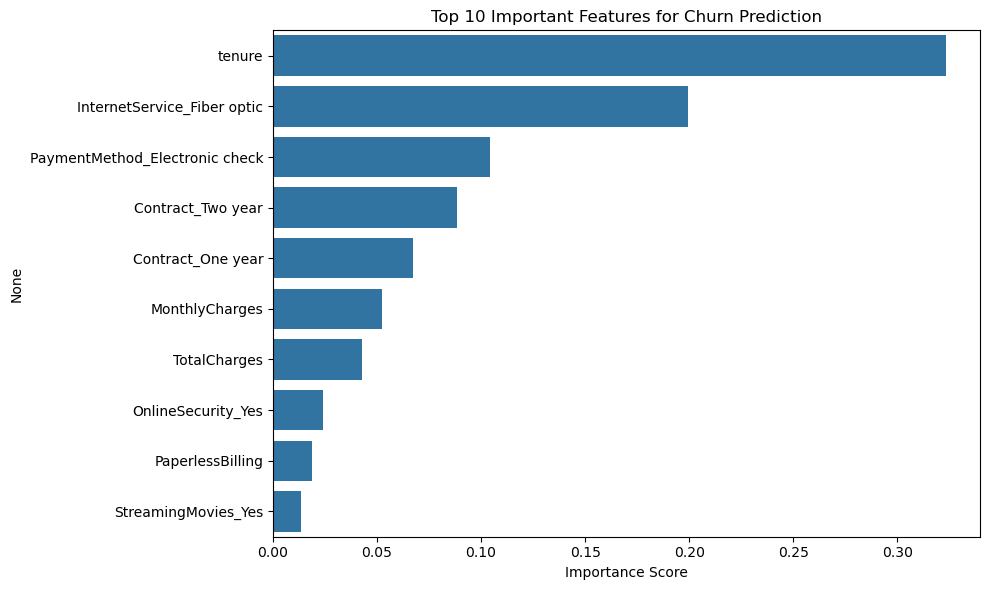

In [48]:
# Feature Importance for the Best Model (if supported)
feature_importances = pd.Series(final_model.best_estimator_.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features for Churn Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### Summary
- Trained six classification models: **Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost, SVM**
- Used **GridSearchCV** for tuning where applicable
- Evaluated using **Accuracy, F1 Score,** and **ROC AUC**
- **Gradient Boosting** was the best-performing model.

## Predicting New Customers

In [ ]:
def predict_churn(filepath, model_path="final_churn_model.pkl", output_path="churn_predictions_output.xlsx"):
    model = joblib.load(model_path)
    scaler = joblib.load("scaler_churn.pkl")
    
    new_data = pd.read_excel(filepath)
    new_data['TotalCharges'] = pd.to_numeric(new_data['TotalCharges'], errors='coerce')
    new_data['TotalCharges'].fillna(new_data['TotalCharges'].median(), inplace=True)
    new_data['SeniorCitizen'] = new_data['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
    new_data['gender'] = new_data['gender'].replace({'Male': 1, 'Female': 0})
    
    for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
        if col in new_data.columns:
            new_data[col] = new_data[col].map({'Yes': 1, 'No': 0})
    
    if 'customerID' in new_data.columns:
        customer_ids = new_data['customerID']
        new_data.drop('customerID', axis=1, inplace=True)
    else:
        customer_ids = None

    cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaymentMethod', 'SeniorCitizen']
    
    new_data = pd.get_dummies(new_data, columns=cat_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)
    new_data_scaled = scaler.transform(new_data)

    predictions = model.predict(new_data_scaled)
    new_data['Churn_Predicted'] = predictions
    new_data['Churn_Predicted'] = new_data['Churn_Predicted'].map({1: 'Yes', 0: 'No'})

    if customer_ids is not None:
        new_data.insert(0, 'customerID', customer_ids)

    new_data.to_excel(output_path, index=False)
    print(f"Predictions saved to {output_path}")
    return new_data

In [44]:
predict_churn(r"C:\Users\jpran\Downloads\new_customers_sample.xlsx")

Predictions saved to churn_predictions_output.xlsx


,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_Yes,Churn_Predicted
0,1,0,1,0,1,1,1,29.85,29.85,False,False,False,0,0,False,0,True,0,False,0,False,0,False,0,False,False,False,0,True,False,False,Yes
1,2,1,0,0,34,1,0,56.95,1889.50,False,True,True,0,0,True,0,False,0,True,0,False,0,True,0,True,False,True,0,False,True,True,No
2,3,0,1,1,12,0,1,42.30,508.70,True,False,False,0,0,True,0,False,0,True,0,True,0,False,0,False,True,False,0,False,False,False,No


## Video Link